<a href="https://colab.research.google.com/github/XiaoxueRan/hku_phys3151_2022/blob/main/Assignment_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2- Solutions

## 1. Gradientdescentmethodandsteepestdescentmethod

This problem is just to follow the the given example in <strong>GradientDescent&ConjugateGradient.ipynb</strong>.

In [1]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
%matplotlib inline
#%matplotlib notebook

In [2]:
A = np.matrix([[5.,2.],[2.,3.]])
b = np.matrix([[3.],[-1.]])
c = 5.0

$$
J(x_1,x_2)=\frac{1}{2} (x_1,x_2) \begin{pmatrix} 5 & 2 \\ 2 & 3 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + (3,-1)\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} +5.0
$$
which is equal to
$$
J(x_1,x_2)=\frac{1}{2}\big(5x_{1}^{2}+4x_1 x_2 +3x_{2}^{2}\big)+3x_{1} - x_2+5.0
$$

In [3]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.gca(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

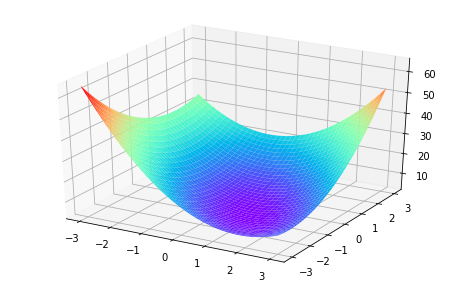

In [4]:
x1,x2,zs = paraboloid(A,b,c)

In [5]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = [-9.9,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,10]
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

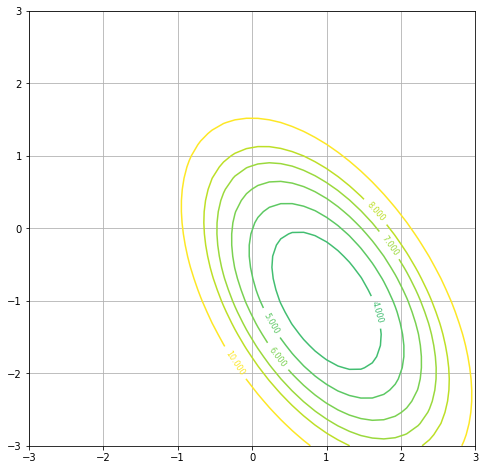

In [6]:
contoursteps(x1,x2,zs)

The minimum is at (1,-1).

In [7]:
x = np.matrix([[-2.],[2.]])
steps = [(-2.,2.)]
i = 0
imax = 1000
eps = 0.001
alpha = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

Local mininum occurs at: [[ 0.99720767]
 [-0.99548191]]
Number of iterations: 374


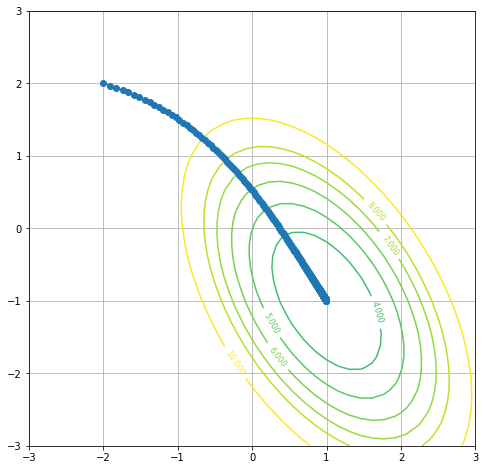

In [8]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

Now let's try the steepest descent method.

In [9]:
x = np.matrix([[-1.],[2.]])
steps = [(-1.,2.)]
i = 0
imax = 1000
eps = 0.001
r = b - A * x
delta = r.T * r
delta0 = delta
while i< imax and delta > eps**2 * delta0:
    alpha = float(delta/float(r.T * (A * r)))
    x = x + alpha*r
    steps.append((x[0,0],x[1,0]))
    r = b - A * x
    delta = r.T * r
    i +=1

Local mininum occurs at: [[ 0.99869876]
 [-0.99804814]]
Number of iterations: 4


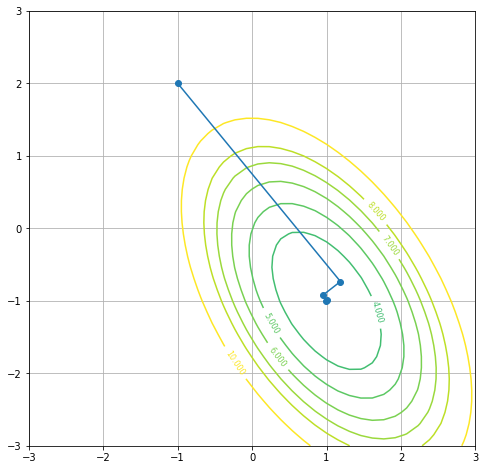

In [10]:
contoursteps(x1,x2,zs,steps)
print ("Local mininum occurs at: "+ str(x))
print ("Number of iterations: "+ str(i))

Apparently, the steepest descent method is far more efficient.

## 2. Conjugategradientmethod

You only need to follow the procedures on slide3(page10).

$$
\theta_{0}=\begin{pmatrix}-2\\0\end{pmatrix}
$$

$$
P_{0}=r_{0}=b-A\theta_{0}=\begin{pmatrix}1\\-2\end{pmatrix}-\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}-2\\0\end{pmatrix}=\begin{pmatrix}7\\0\end{pmatrix}
$$

$$
\alpha_{0}=\frac{r_{0}^{T}r_{0}}{P_{0}^{T}AP_{0}}=\frac{\begin{pmatrix}7&0\end{pmatrix}\begin{pmatrix}7\\0\end{pmatrix}}{\begin{pmatrix}7&0\end{pmatrix}\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}7\\0\end{pmatrix}}=\frac{1}{3}
$$

$$
\theta_{1}=\theta_{0}+\alpha_{0}P_{0}=\begin{pmatrix}-2\\0\end{pmatrix}+\frac{1}{3}\begin{pmatrix}7\\0\end{pmatrix}=\begin{pmatrix}\frac{1}{3}\\0\end{pmatrix}
$$

$$
r_{1}=r_{0}-\alpha_{0}AP_{0}=\begin{pmatrix}7\\0\end{pmatrix}-\frac{1}{3}\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}7\\0\end{pmatrix}=\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}
$$

$$
\beta_{0}=\frac{r_{1}^{T}r_{1}}{r_{0}^{T}r_{0}}=\frac{\begin{pmatrix}0&-\frac{7}{3}\end{pmatrix}\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}}{\begin{pmatrix}7&0\end{pmatrix}\begin{pmatrix}7\\0\end{pmatrix}}=\frac{1}{9}
$$

$$
P_{1}=r_{1}+\beta_{0}P_{0}=\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}+\frac{1}{9}\begin{pmatrix}7\\0\end{pmatrix}=\begin{pmatrix}\frac{7}{9}\\-\frac{7}{3}\end{pmatrix}
$$

$$
\alpha_{1}=\frac{r_{1}^{T}r_{1}}{P_{1}^{T}AP_{1}}=\frac{\begin{pmatrix}0&-\frac{7}{3}\end{pmatrix}\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}}{\begin{pmatrix}\frac{7}{9}&-\frac{7}{3}\end{pmatrix}\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}\frac{7}{9}\\-\frac{7}{3}\end{pmatrix}}=\frac{3}{5}
$$

$$
\theta_{2}=\theta_{1}+\alpha_{1}P_{1}=\begin{pmatrix}\frac{1}{3}\\0\end{pmatrix}+\frac{3}{5}\begin{pmatrix}\frac{7}{9}\\-\frac{7}{3}\end{pmatrix}=\begin{pmatrix}\frac{4}{5}\\-\frac{7}{5}\end{pmatrix}
$$

$$
r_{2}=r_{1}-\alpha_{1}AP_{1}=\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}-\frac{3}{5}\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}\frac{7}{9}\\-\frac{7}{3}\end{pmatrix}=\begin{pmatrix}0\\0\end{pmatrix}
$$

$$
r_{0}^{T}r_{1}=\begin{pmatrix}7&0\end{pmatrix}\begin{pmatrix}0\\-\frac{7}{3}\end{pmatrix}=0
$$

$$
P_{0}^{T}AP_{1}=\begin{pmatrix}7&0\end{pmatrix}\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}\frac{7}{9}\\-\frac{7}{3}\end{pmatrix}=0
$$

In [11]:
A = np.matrix([[3.,1.],[1.,2.]])
b = np.matrix([[1.],[-2.]])
c = 0

In [12]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.gca(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

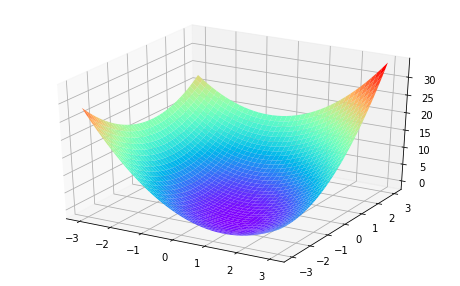

In [13]:
x1,x2,zs = paraboloid(A,b,c)

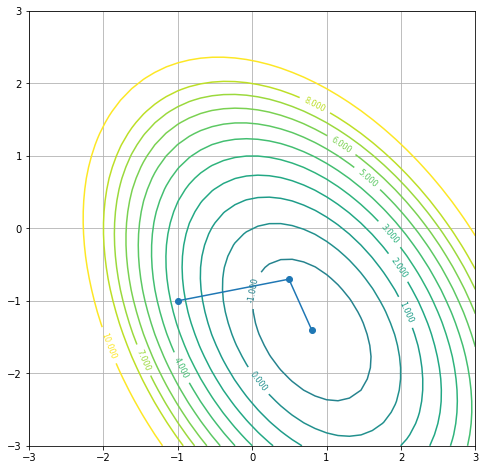

In [14]:
x = np.matrix([[-1.],[-1.]])
steps = [(-1.,-1.)] # steps is a list and the tuple (-1,-1) is the initial position
i = 0
imax = 3
eps = 0.01
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    r = r - alpha * (A * p)
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    p = r + beta * p
    i += 1
    
contoursteps(x1, x2, zs, steps)

In [15]:
print ("Local mininum occurs at:\n"+ str(x))

Local mininum occurs at:
[[ 0.8]
 [-1.4]]
